# PHASE II PROJECT 

#### AUTHORS

1. STACY KIRIIRI
2. ROSE KYALO
3. ANGEL ATUNGIRE
4. BRYTONE OMARE

# Insights on Property Investment Profitability

### Overview

In this project, we're diving deep into the King County House Sales dataset to understand what makes properties profitable in King County's real estate market. Our main aim is to provide valuable insights to RASB-berry Property Investors who want to make smart investment decisions. We'll be looking at various aspects of properties, like their size, number of bedrooms, and condition, to see which factors have the most impact on the sale prices of houses.
By doing this, we hope to help RASB-berry investors optimize their strategies and increase their
chances of getting better returns in the King County real estate market. 

### Business Problem

### Stakeholder: RASB-berry Property Investors
    
RASB-berry Property investors are looking to optimize their investment strategies by purchasing properties with the potential for high returns. They want to know which property attributes, such as square footage, number of bedrooms,and condition of the property, are most strongly correlated with sale prices.

### Data understanding

In [1]:
# import the neccessary libraries
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# load data
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset contains information about real estate properties in King County, consisting of 21 columns. These columns provide details such as property price, number of bedrooms, bathrooms, square footage, floors, waterfront status, condition, grade, and more. Some columns have missing values, like 'yr_renovated' and 'waterfront.' This dataset is valuable for analyzing the factors influencing property prices and making informed investment decisions in the King County real estate market.

In [4]:
# Summary statistics of the dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### Data preparation

We will assess the presence of null values in several columns, specifically 'waterfront,' 'view,' and 'yr_renovated,' and determine the percentage of missing values in each of these columns.

In [6]:
# calculate the percentage of the  null values - waterfront
df['waterfront'].isnull().mean() * 100

11.00152798999861

In [7]:
# calculate the percentage of the null values - yr_renovated
df['yr_renovated'].isnull().mean() * 100

17.78950780200954

In [8]:
# calculate the percentage of the null values - view
df['view'].isnull().mean() * 100

0.29170718155299347

Given that the number of null values in our dataset is relatively small and not substantial, we have decided to proceed by removing these null values.

In [9]:
# drop null values
df.dropna(inplace=True)
df.drop(df.loc[df['sqft_basement']=='?'].index,inplace=True) 

In [10]:
# verify null values are removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15429 non-null  int64  
 1   date           15429 non-null  object 
 2   price          15429 non-null  float64
 3   bedrooms       15429 non-null  int64  
 4   bathrooms      15429 non-null  float64
 5   sqft_living    15429 non-null  int64  
 6   sqft_lot       15429 non-null  int64  
 7   floors         15429 non-null  float64
 8   waterfront     15429 non-null  object 
 9   view           15429 non-null  object 
 10  condition      15429 non-null  object 
 11  grade          15429 non-null  object 
 12  sqft_above     15429 non-null  int64  
 13  sqft_basement  15429 non-null  object 
 14  yr_built       15429 non-null  int64  
 15  yr_renovated   15429 non-null  float64
 16  zipcode        15429 non-null  int64  
 17  lat            15429 non-null  float64
 18  long  

In [11]:
# check duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


We will convert the columns "yr_built," "yr_renovated," and "date" to datetime objects to facilitate our analysis.

In [13]:
df['yr_built'] = pd.to_datetime(df['yr_built'])

In [14]:
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

In [15]:
df['date'] = pd.to_datetime(df['date'])

#### With our clean dataset in hand, let's dive into the analysis!

To assist RASB investors in making informed decisions regarding their investments, we will employ multiple linear regression analysis. This approach will allow us to build a predictive model for house prices in King County, aiding investors in their decision-making process.

Our dependent variable for this analysis will be the sale prices. To gain insights into the relationship between sale prices and other variables, we will examine the correlation among these factors.

In [16]:
# correlation between sales price and other variables
df.corr()["price"]

id              -0.014954
price            1.000000
bedrooms         0.305792
bathrooms        0.525655
sqft_living      0.706498
sqft_lot         0.084687
floors           0.260143
sqft_above       0.612374
zipcode         -0.049371
lat              0.306991
long             0.021948
sqft_living15    0.583400
sqft_lot15       0.080569
Name: price, dtype: float64

Attributes like "sqft_living," "bathrooms," and "sqft_above" exhibit strong positive correlations with sale prices, suggesting that larger living spaces and more bathrooms tend to command higher prices. Conversely, "zipcode" shows a negative correlation, indicating that certain areas may influence prices negatively. 

We will begin by creating a model using the variable that exhibits the highest correlation with sale prices, which is "sqft_living." This approach allows us to explore how changes in the square footage of the living space impact house prices in King County.

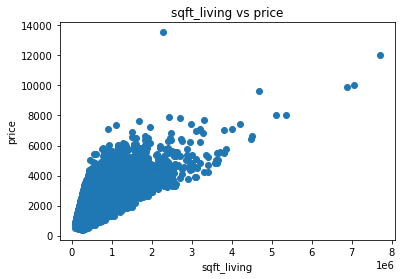

In [17]:
# visualize sale price and sqft_living
plt.scatter(df.price,df.sqft_living)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("sqft_living vs price")
plt.show()

The visual representation clearly demonstrates a linear relationship between house prices and the square footage of living space (sqft_living).

#### Model building - 1

In [18]:
# Select the independent variable and dependent variable
X = df['sqft_living']  # Feature (square footage of living area)
y = df['price']           # Target (property price)

In [19]:
# Add a constant (intercept) term to the independent variable
model = sm.OLS(y, sm.add_constant(X))

In [20]:
# fit the model
results = model.fit()

#### Model Summary

In [21]:
# Print the summary of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:52:56   Log-Likelihood:            -2.1450e+05
No. Observations:               15429   AIC:                         4.290e+05
Df Residuals:                   15427   BIC:                         4.290e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.62e+04   5268.236    -10.668      

#### Model Interpretation

The model equation, **price = 286.1494 * sqft_living  - 55,160.0**, indicates that for every unit increase in square footage of living space (X), the house price (y) is expected to increase by 286.1494 dollars. The intercept value of -55,160.0 suggests that when there is no square footage of living space in the home (X = 0), the estimated price of the house is -55,160.0 dollars.

Statistically, the model is highly significant, as evidenced by the F-statistic's p-value, which is well below the conventional significance level of 0.05. Additionally, the coefficients of the model are individually significant, with t-statistic p-values also comfortably below the 0.05 threshold.

The model successfully explains approximately 49.9% of the variance in house prices, indicating a moderate level of predictive power. This means that nearly half of the price variation can be accounted for by the square footage of living space, while other factors may contribute to the remaining variability.

#### Visualization

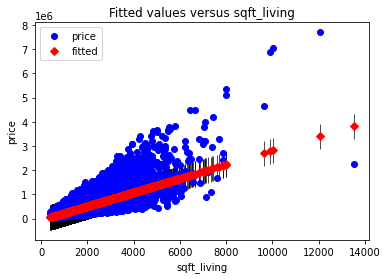

In [22]:
# visualization - fitted model
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

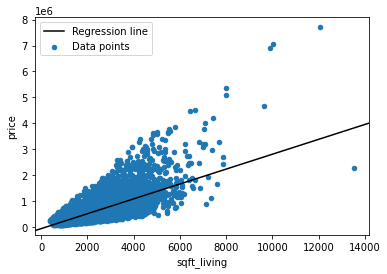

In [23]:
# visualization - regression line
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results = results, label="Regression line", ax=ax, color="black")
ax.legend();

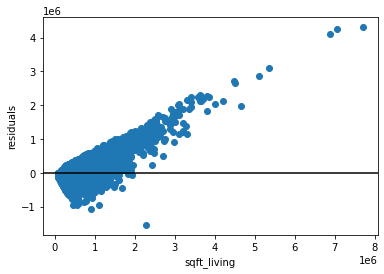

In [24]:
# visualization - residuals
fig, ax = plt.subplots()

ax.scatter(df["price"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

#### Model prediction

In [25]:
y1_predicted = results.predict(sm.add_constant(X))
y1_predicted

1        6.803490e+05
3        5.055252e+05
4        4.252782e+05
5        1.497148e+06
8        4.539379e+05
             ...     
21591    3.192376e+05
21592    3.822888e+05
21593    6.058339e+05
21594    2.361247e+05
21596    2.361247e+05
Length: 15429, dtype: float64

#### Model evaluation

In [26]:
# calculate Mean Absolute Error
mae_1 = mean_absolute_error(y,y1_predicted)

# calculate Mean Squared Error
mse_1 = mean_squared_error(y,y1_predicted)

#calculate Root Mean Squared Error
rmse_1 = mean_squared_error(y,y1_predicted,squared = False)

print("Mean Absolute Error(MAE):",mae_1)
print("Mean Squared Error(MSE):",mse_1)
print("Root Mean Squared Error(RMSE):",rmse_1)

Mean Absolute Error(MAE): 174878.71582154534
Mean Squared Error(MSE): 69687826856.01277
Root Mean Squared Error(RMSE): 263984.52010679105


The MAE of approximately $174,670 indicates that, on average, the model's predictions are off by this amount when estimating housing prices. 

The MSE, which is approximately $69,451,304,397 indicates the average squared difference between the model's predictions and the actual prices. 

The RMSE of approximately $263,536 is the square root of the MSE and represents the average error in the same units as the target variable (price)

#### Model building - 2

We improved our model by adding more information to it. Specifically, we included three new factors: "sqft_above," "sqft_living15," and "bathrooms." This helps us better understand how these factors affect our model's accuracy, making our predictions more precise.

In [27]:
# add another independent variable
X_second = df[["sqft_living", "sqft_above","bathrooms","sqft_living15"]]

In [28]:
# add a constant (intercept) term to the independent variable
second_model = sm.OLS(y, sm.add_constant(X_second))

In [29]:
# fit the model
second_results = second_model.fit()

#### Model Summary

In [30]:
# summary of the model
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     3946.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:52:58   Log-Likelihood:            -2.1440e+05
No. Observations:               15429   AIC:                         4.288e+05
Df Residuals:                   15424   BIC:                         4.288e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.03e+05   7339.213    -14.030

#### Model Interpretation

In this updated multiple linear regression model, we've refined our understanding of the factors influencing housing prices. The equation for predicting housing prices now stands as follows:

**Price = -100,600 + 274.9959 * sqft_living - 28.8034 * sqft_above - 5,006.9916 * bathrooms + 65.7677 * sqft_living15**

Now, let's explore the key insights from this model:

**Overall Model Significance:**
The model as a whole demonstrates statistical significance, as indicated by the F-statistic's p-value being well below the conventional significance threshold of 0.05. This suggests that at least one of the independent variables has a significant impact on housing prices.

**Explained Variance:**
Our model accounts for approximately 50.5% of the variance in housing prices. This represents a slight improvement compared to the baseline model, indicating that we've captured a bit more of the variability in prices.

**Statistical Significance of Coefficients:**

- **sqft_living:** The coefficient for square footage of living space (sqft_living) is statistically significant, with a t-statistic p-value of 0.000. This indicates that square footage has a meaningful and significant impact on determining housing prices.

- **sqft_above:** The coefficient for the square footage of the area above ground (sqft_above) is also statistically significant (p-value < 0.05). It suggests that the square footage above ground is a meaningful contributor to housing price variations.

- **bathrooms:** The coefficient for the number of bathrooms (bathrooms) does not achieve statistical significance, as its associated p-value exceeds the 0.05 threshold. This suggests that, in this particular model, the number of bathrooms may not be a statistically significant contributor to housing price variations.

- **sqft_living15:** The coefficient for square footage of living space in 2015 (sqft_living15) is statistically significant (p-value < 0.05). This indicates that the square footage of living space in 2015 also plays a meaningful role in determining housing prices.

**Adjusted R-squared Improvement:**
The adjusted R-squared value has increased compared to the baseline model. This is an encouraging sign, indicating that the inclusion of bathrooms, square footage above ground, and square footage of living space in 2015 in our model has contributed to a more meaningful explanation of the relationship between square footage of living space (sqft_living) and housing prices.

In summary, we've refined our model to better explain housing price variations. While square footage of living space (sqft_living) and the square footage above ground (sqft_above) continue to have significant impacts, the number of bathrooms (bathrooms) may not be a statistically significant contributor in this particular model. Additionally, square footage of living space in 2015 (sqft_living15) is also a significant factor. This enhanced model provides a more nuanced understanding of how these variables collectively influence housing prices.

Based on this model, our recommendations to RASB-berry Property Investors  would be:

1. **Focus on Square Footage:** Invest in properties with more square footage (sqft_living) as it significantly impacts prices positively.

2. **Consider Above-Ground Area:** Properties with larger above-ground areas (sqft_above) also tend to have higher prices, so factor this into your investment decisions.

3. **Be Cautious with Bathrooms:** The number of bathrooms (bathrooms) doesn't strongly affect prices in this model, so don't prioritize it too much.

4. **Pay Attention to 2015 Living Space:** Square footage of living space in 2015 (sqft_living15) is a significant contributor to housing prices, so consider properties with larger living spaces.

5. **Diversify:** Spread your investments across different property types and neighborhoods to reduce risk.

6. **Stay Informed:** Keep up with local market trends, economic conditions, and regulations to make informed investment choices.

#### Visualization

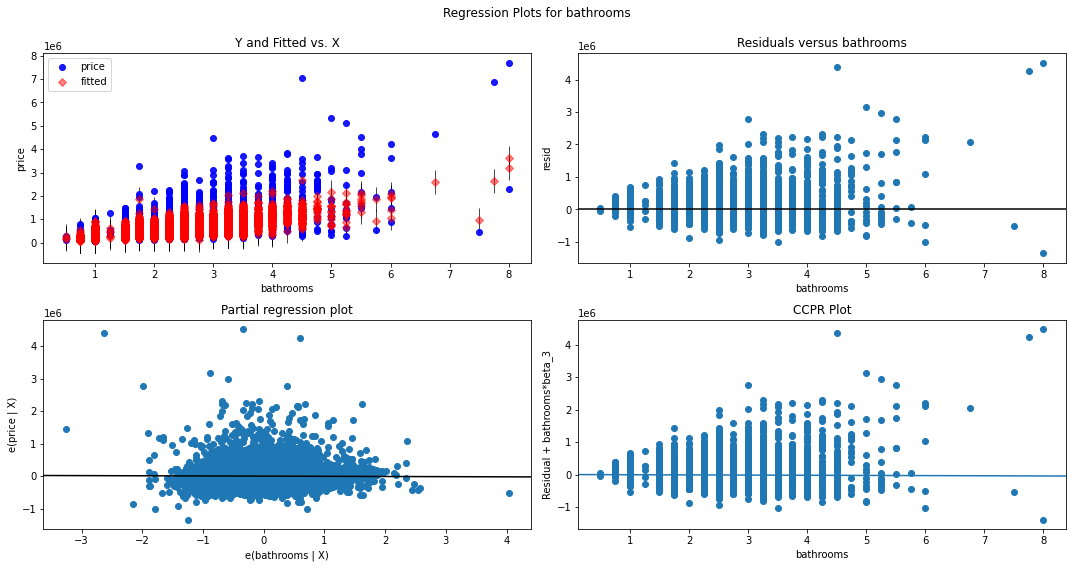

In [31]:
# visualization - bathrooms
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results,"bathrooms",fig = fig)
plt.show()

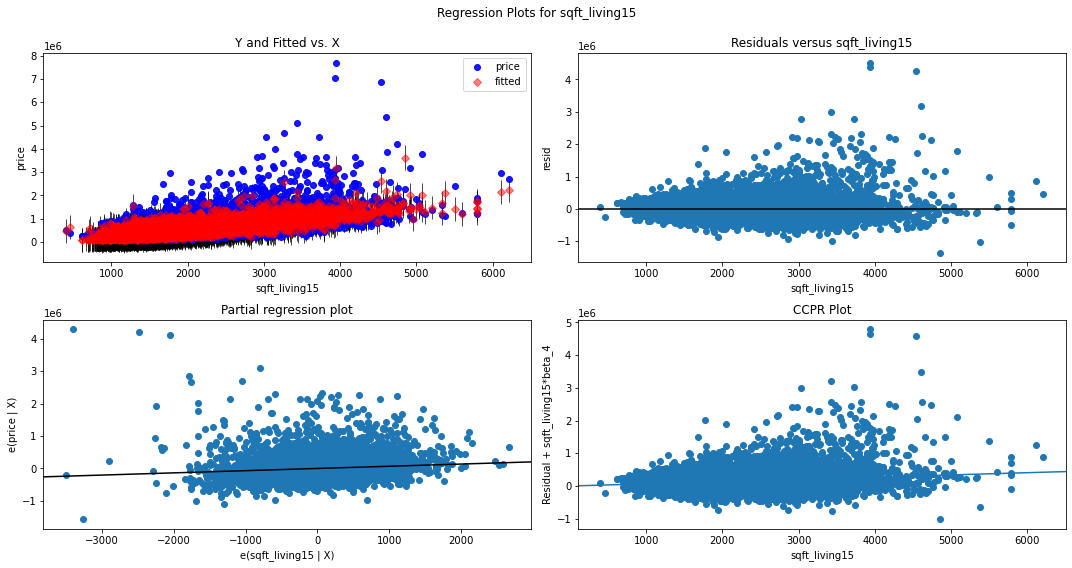

In [32]:
# visualization - sqft_living15
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results,"sqft_living15",fig = fig)
plt.show()

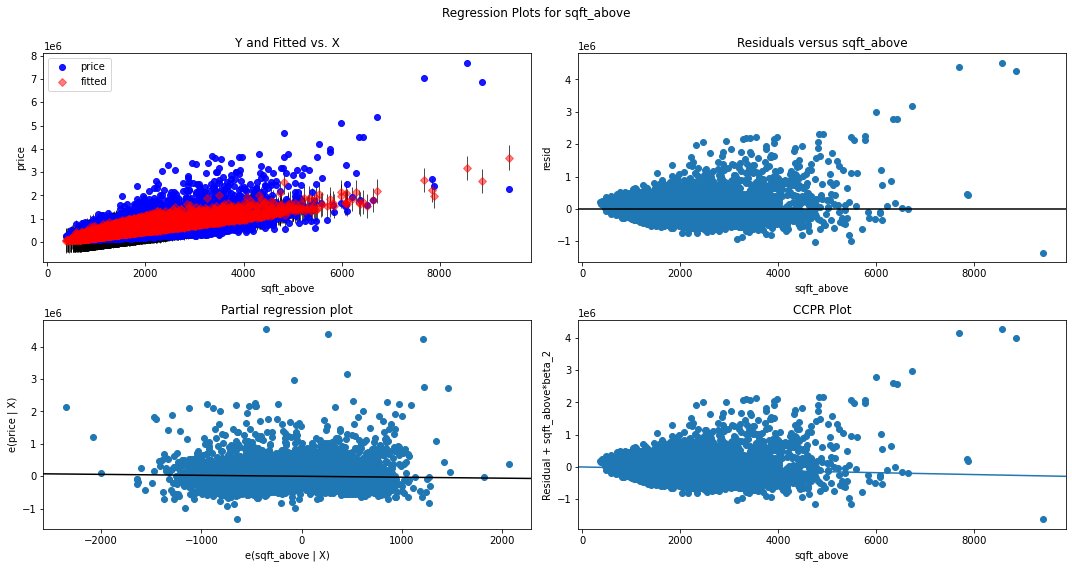

In [33]:
# visualization - sqft_above
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results,"sqft_above",fig = fig)
plt.show()

#### Model Prediction

In [34]:
y2_predicted = second_results.predict(sm.add_constant(X_second))
y2_predicted

1        6.425022e+05
3        4.812980e+05
4        4.210336e+05
5        1.571933e+06
8        4.710694e+05
             ...     
21591    2.994077e+05
21592    3.631828e+05
21593    5.750667e+05
21594    2.127170e+05
21596    2.127170e+05
Length: 15429, dtype: float64

#### Model Evaluation

In [35]:
# calculate Mean Absolute Error
mae_2 = mean_absolute_error(y,y2_predicted)

# calculate Mean Squared Error
mse_2 = mean_squared_error(y,y2_predicted)

#calculate Root Mean Squared Error
rmse_2 = mean_squared_error(y,y2_predicted,squared = False)

print("Mean Absolute Error(MAE):",mae_2)
print("Mean Squared Error(MSE):",mse_2)
print("Root Mean Squared Error(RMSE):",rmse_2)

Mean Absolute Error(MAE): 173516.50453540296
Mean Squared Error(MSE): 68769350180.9709
Root Mean Squared Error(RMSE): 262239.10879380844


The MAE of approximately $173,373 indicates that, on average, the model's predictions are off by this amount when estimating housing prices. 

The MSE, which is approximately $68,591,934,645, indicates the average squared difference between the model's predictions and the actual prices. 

The RMSE of approximately $261,901 is the square root of the MSE and represents the average error in the same units as the target variable (price)

In our next analysis,We aim to investigate the influence of categorical features, specifically "waterfront," "view," "condition," and "grade," on the pricing of properties.  

#### Model building - 3

In [36]:
# load data 
new_df = df[["waterfront", "view", "condition", "grade","price"]]
new_df

,waterfront,view,condition,grade,price
1,NO,NONE,Average,7 Average,538000.0
3,NO,NONE,Very Good,7 Average,604000.0
4,NO,NONE,Average,8 Good,510000.0
5,NO,NONE,Average,11 Excellent,1230000.0
8,NO,NONE,Average,7 Average,229500.0
...,...,...,...,...,...
21591,NO,NONE,Average,8 Good,475000.0
21592,NO,NONE,Average,8 Good,360000.0
21593,NO,NONE,Average,8 Good,400000.0
21594,NO,NONE,Average,7 Average,402101.0


In [37]:
# Perform one-hot encoding for categorical variables
new_df_encoded = pd.get_dummies(new_df, columns=["waterfront", "view", "condition", "grade"], drop_first=True)

# Define the independent variables (X) and the dependent variable (y)
X = new_df_encoded.drop(columns=["price"])  # Independent variables
y = new_df_encoded["price"]  # Dependent variable

In [38]:
# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

In [39]:
# Fit the multiple regression model
model = sm.OLS(y, X).fit()

#### Model Summary

In [40]:
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1182.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:53:03   Log-Likelihood:            -2.1290e+05
No. Observations:               15429   AIC:                         4.258e+05
Df Residuals:                   15409   BIC:                         4.260e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.128e+06   1

#### Model Interpretation

In this multiple regression model, we have examined how various categorical variables impact housing prices. Here are the key takeaways:

1. Overall Model Significance: The model as a whole is statistically significant, indicated by the low p-value of the F-statistic (p < 0.001). This suggests that at least one of the independent variables has a significant impact on housing prices.

2. Explained Variance: Our model explains approximately 59.2% of the variance in housing prices. This indicates a strong ability to capture and explain the variability in prices compared to our baseline model and model 2.

3. Significance of Categorical Variables: Several categorical variables, such as waterfront, view, condition, and grade, have a significant impact on housing prices. Notably, properties with waterfront views command substantially higher prices.

4. Limited Impact of Some Conditions: The "condition" variable, particularly the "Fair" and "Poor" conditions, does not have a statistically significant impact on prices in this model.

5. Luxury and Mansion Grades: Properties classified as "Luxury" and "Mansion" grades significantly increase housing prices, indicating that higher-grade properties are valued more.

6. Lower Grades: Conversely, lower-grade properties such as "Poor," "Low," and "Fair" have a substantial negative impact on prices.

In summary, this model provides insights into how various categorical variables influence housing prices. It emphasizes the importance of factors like waterfront views and higher property grades, while also highlighting the negative impact of lower-grade properties. Understanding these variables can assist in making more informed real estate investment decisions.

Based on this model, here are our recommendations to RASB-berry Property Investors:

1. **Prioritize Waterfront Properties:** Investing in properties with waterfront views can yield significantly higher returns, as indicated by the substantial price difference. Consider waterfront properties as a prime option.

2. **Consider Property Grade:** Higher-grade properties, such as "Luxury" and "Mansion," tend to command premium prices. These properties may provide excellent investment opportunities, but also consider your budget and risk tolerance.

3. **Avoid Lower-Grade Properties:** Lower-grade properties, like "Poor," "Low," and "Fair," negatively impact prices. Be cautious about investing in such properties unless there are compelling reasons to do so.

4. **Evaluate Condition Carefully:** While "condition" doesn't show a strong overall influence on prices in this model, make sure to assess the condition of the properties you consider for investment. Well-maintained properties can offer better long-term prospects.

5. **Diversify Your Portfolio:** To spread risk, diversify your investments across different property types, locations, and grades. This approach can help mitigate potential losses in case of market fluctuations.

6. **Stay Informed:** Continuously monitor local market trends, economic conditions, and regulations. Staying informed will help you make timely and well-informed investment decisions.

#### Visualization 

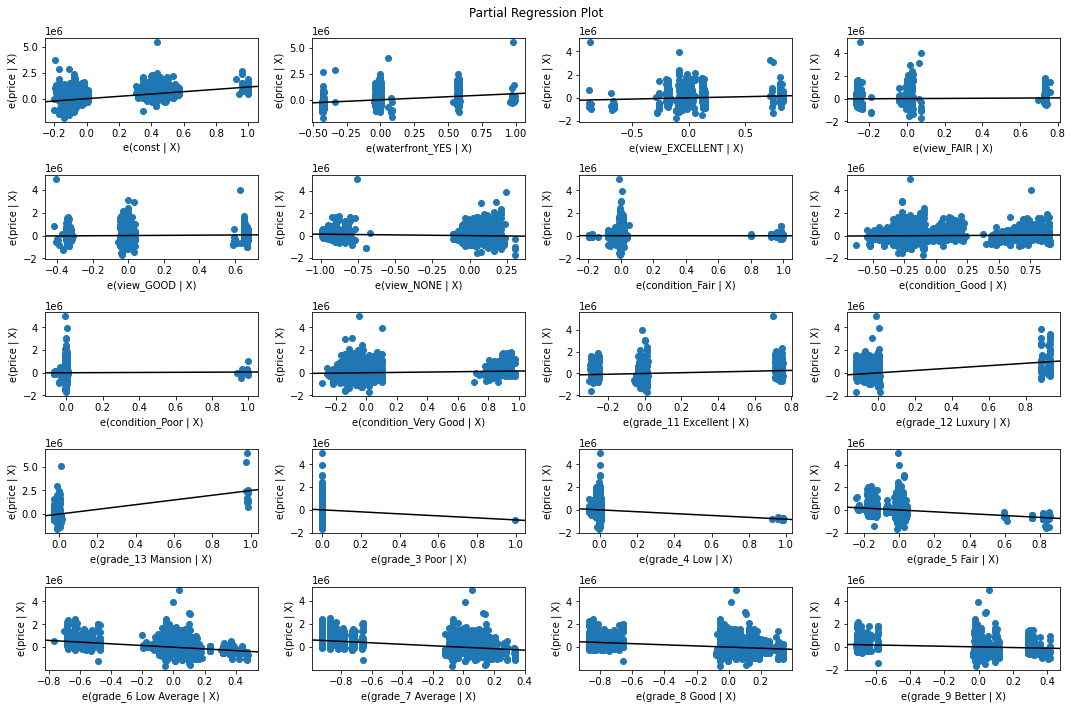

In [41]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(
    model,
    exog_idx=list(X.columns),
    grid=(5, 4), 
    fig=fig
)
plt.tight_layout()
plt.show()

#### Model prediction

In [42]:
y3_predicted = model.predict(sm.add_constant(X))
y3_predicted

1        3.610766e+05
3        5.127783e+05
4        4.990602e+05
5        1.350931e+06
8        3.610766e+05
             ...     
21591    4.990602e+05
21592    4.990602e+05
21593    4.990602e+05
21594    3.610766e+05
21596    3.610766e+05
Length: 15429, dtype: float64

#### Model Evaluation

In [43]:
# calculate Mean Absolute Error
mae_3 = mean_absolute_error(y,y3_predicted)

# calculate Mean Squared Error
mse_3 = mean_squared_error(y,y3_predicted)

#calculate Root Mean Squared Error
rmse_3 = mean_squared_error(y,y3_predicted,squared = False)

print("Mean Absolute Error(MAE):",mae_3)
print("Mean Squared Error(MSE):",mse_3)
print("Root Mean Squared Error(RMSE):",rmse_3)

Mean Absolute Error(MAE): 154716.96207385775
Mean Squared Error(MSE): 56623085014.94319
Root Mean Squared Error(RMSE): 237956.05689904848


The MAE of approximately $154457.619 indicates that, on average, the model's predictions are off by this amount when estimating housing prices. 

The MSE, which is approximately  $56,477,486,763.58, , indicates the average squared difference between the model's predictions and the actual prices. 

The RMSE of approximately $237,649.92, is the square root of the MSE and represents the average error in the same units as the target variable (price)

## Conclusion

After a comprehensive evaluation of the three models we've developed, it's evident that the third model stands out as the most promising choice. This conclusion is primarily based on its significantly lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) compared to the other two models.

Notably, the MAE of the third model, when considered alongside the average housing price of approximately $541,317.18, is notably lower. This implies that, on average, the model's predictions deviate by a relatively smaller amount from the actual prices, showcasing its superior predictive accuracy.

Therefore, given the compelling performance metrics, particularly the lower MAE concerning the average price, we recommend adopting the third model as the preferred choice for predicting housing prices. This model demonstrates a more accurate estimation of prices, which can be highly valuable for real estate investment decisions and related applications.

#### Key Findings

Here are some of the key findings from our analysis of the King County housing market:

1. **Square Footage Matters:** The square footage of living space (sqft_living) has a significant positive impact on housing prices. Investing in properties with larger living spaces tends to result in higher prices.

2. **Waterfront Properties Command a Premium:** Waterfront properties are highly desirable and come with a substantial price premium. Investors should consider these properties for potentially higher returns.

3. **Views Enhance Value:** Homes with excellent views or very good views also tend to fetch higher prices. This feature can be a valuable investment consideration.

4. **Condition and Grade Influence Price:** The condition and grade of a property are important factors affecting its price. Properties in very good condition and with higher grades tend to have higher values.

5. **Budget Planning:** With an average housing price of approximately $541,317.18, investors should budget and plan their investments accordingly.

In conclusion, here are the key recommendations and conclusions for RASB-berry Property Investors based on our analysis:

1. **Model Selection:** We recommend using the third model as it demonstrates superior predictive accuracy with lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) compared to the other two models.

2. **Price Influencers:** Focus your investment strategy on the factors that have the most significant impact on housing prices, which include square footage of living space (sqft_living), waterfront properties, views, condition, and grade.

3. **Property Features:** Prioritize properties with larger square footage (sqft_living) and those with waterfront views, excellent views, very good conditions, and higher grades, as these tend to command higher prices.

4. **Diversification:** Consider diversifying your real estate investments across different property types and neighborhoods to reduce risk and capture opportunities in various market segments.

5. **Stay Informed:** Continuously monitor local market trends, economic conditions, and regulations to make informed investment decisions.

6. **Budget Planning:** Given the average housing price of approximately $541,317.18, plan your investments accordingly and ensure your budget aligns with market conditions.

## Additional Analysis

#### When is the best time to buy, hold, or sell properties in different neighborhoods?

In [44]:
# Create a new column with only the months
df['month'] = df['date'].dt.strftime('%B')

In [45]:
#Initialize an empty dictionary to store the counts
month_count_dict = {}

# Iterate through the month column and count occurences
for i in df['month']:
    if i in month_count_dict:
        month_count_dict[i] += 1
    else:
        month_count_dict[i] = 1

In [46]:
# create a list of months in chronological order
chron_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
# create a new dictionary with months in chronological order
month_dict = {month: month_count_dict[month] for month in chron_months}

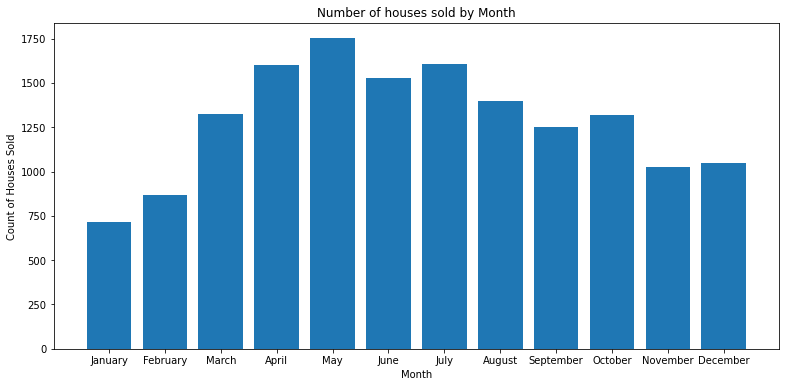

In [47]:
# Extract the months (keys) and their corresponding counts (values) from the dictionary
months = list(month_dict.keys())
counts = list(month_dict.values())

# Create a bar graph
plt.figure(figsize=(13, 6))
plt.bar(months, counts, tick_label=months)

# Customize the plot labels and title
plt.xlabel('Month')
plt.ylabel('Count of Houses Sold')
plt.title('Number of houses sold by Month')

# Show the plot
plt.show()

The data visualization we've presented above reveals a clear trend in the housing market over the years. It appears that the majority of houses were sold during the middle months of the year, with May standing out as the peak month for real estate transactions. This pattern is consistent year after year.

If you're considering buying, selling, or holding onto properties, the data suggests that the opportune time tends to be during the middle months, spanning from April through July. These months consistently exhibit higher levels of real estate activity, making them potentially advantageous for real estate decisions.

#### How do location-related variables (e.g., ZIP code) impact property values?

In [48]:
import folium
from folium.plugins import MarkerCluster

# Create a Folium map
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for index, row in df.iterrows():
    popup_text = f"Location: {row['zipcode']}<br>Price: ${row['price']: .2f}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(marker_cluster)

# Display the map
m.save('map.html')

In [49]:
# Sort the DataFrame by the 'Price' column in ascending order for least expensive houses
df_least_expensive = df.sort_values(by='price').head(30)

# Sort the DataFrame by the 'Price' column in descending order for most expensive houses
df_most_expensive = df.sort_values(by='price', ascending=False).head(30)

# Create a Folium map
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Create separate MarkerCluster layers for most and least expensive houses
cluster_least_expensive = MarkerCluster().add_to(m)
cluster_most_expensive = MarkerCluster().add_to(m)

# Add markers for the least expensive houses
for index, row in df_least_expensive.iterrows():
    popup_text = f"Location: {row['zipcode']}<br>price: ${row['price']:.2f}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(cluster_least_expensive)

# Add markers for the most expensive houses
for index, row in df_most_expensive.iterrows():
    popup_text = f"Location: {row['zipcode']}<br>price: ${row['price']:.2f}"
    folium.Marker([row['lat'], row['long']], popup=popup_text).add_to(cluster_most_expensive)

# Display the map
m.save('map_with_clustered_prices.html')

Our exploration included the creation of a dynamic Folium map to examine the potential impact of location on house prices. Upon inspecting the [Folium map](map_with_clustered_prices.html), clear trend emerges: the most expensive homes tend to be situated in close proximity to Lake Washington, while the less expensive properties are located further away from the lake.

This spatial analysis aligns with the findings from our third model, emphasizing the desirability and premium associated with waterfront properties. For investors seeking potential higher returns, these waterfront properties should be a point of consideration and focus. Their unique location and appeal could make them valuable additions to an investment portfolio.